In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from skshift import ExplanationShiftDetector
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")
from sklearn.metrics import roc_auc_score
import numpy as np

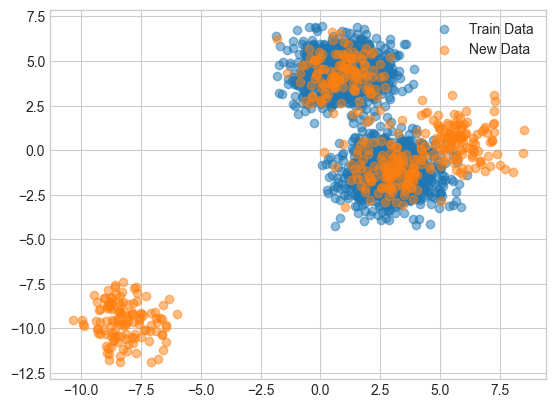

In [2]:
# Create train, hold and test ID data
n_feats = 5
X, y = make_blobs(
    n_samples=2000, centers=2, n_features=n_feats, random_state=0, cluster_std=1
)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.5, random_state=0)
# TODO VALIDATION SET
X_hold, y_hold = make_blobs(
    n_samples=2000, centers=2, n_features=n_feats, random_state=0
)

# Create OOD data
X_ood, y_ood = make_blobs(n_samples=500, centers=4, n_features=n_feats, random_state=0)
X_ood_te, y_ood_te = make_blobs(
    n_samples=500, centers=1, n_features=n_feats, random_state=1
)

# Concatenate Distributions
X_new = np.concatenate([X_te, X_ood_te])
y_new = np.concatenate([np.zeros_like(y_te), np.ones_like(y_ood_te)])
# Train test split of new data
X_new_tr, X_new_te, y_new_tr, y_new_te = train_test_split(
    X_new, y_new, test_size=0.5, random_state=0
)

# Plot bubbles
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label="Train Data")
plt.scatter(X_ood[:, 0], X_ood[:, 1], alpha=0.5, label="New Data")
plt.legend()
plt.show()

In [3]:
#  Fit model
model = XGBClassifier()
model.fit(X_tr, y_tr)
# AUC print('AUC: ', roc_auc_score(y_te, model.predict(X_te)))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [4]:
# Fit Detector
detector = ExplanationShiftDetector(model=model, gmodel=LogisticRegression())
detector.fit_detector(X_te, X_ood)

# Evaluate
roc_auc_score(y_new, detector.predict_proba(X_new)[:, 0])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


0.7355

In [5]:
detector.detector.coef_

array([[ 0.        ,  2.45736061,  0.        , -0.00914255,  0.        ]])